# Comparing performance of all classifier models (1-4)

We will compare validation performance on all fine-tuned classifiers.
Then we determine final test performance.

1. Vanilla Finetuning
	1. erste 512 tokens
	2. über alle daten A version
	3. über alle Parameter??? (\#FRAGE what actually IS tuned??) -> auf jeden Fall kein LoRa
	4. 71\% auf test daten
2. Sliding Window
	1. full speeches
	2. full data A version
	3. full param
	4. ??
3. Sliding Window + Hyperparameter Tuning
	1. full speeches
	2. full data A version
	3. full param (?)
	4. hyper testing -> yay final model
4. Sliding Window + Hyperparameter Tuning -> Data B Version

In [3]:
# setup 
import pprint
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# model names
v1_model_name = "vanilla_bert_model"
v2_model_name = "slidingwindow_bert_model"
v3_model_name = "tune_bert_model_A"
v4_model_name = "tune_bert_model_B"
v5_model_name = "weighted_bert_model"


# load data
v1_val = pd.read_csv("../data/v1_vanilla_classifier_val_results.csv")
v1_test = pd.read_csv("../data/v1_vanilla_classifier_test_results.csv")
v2_val = pd.read_csv("../data/v2_window_classifier_val_results.csv")
v2_test = pd.read_csv("../data/v2_window_classifier_test_results.csv")
v3_val = pd.read_csv("../data/allresultsA/classifier_final_A_validation_results.csv")
v3_test = pd.read_csv("../data/allresultsA/classifier_final_A_test_results.csv")
v4_val = pd.read_csv("../data/allresultsB/classifier_final_B_validation_results.csv")
v4_test = pd.read_csv("../data/allresultsB/classifier_final_B_test_results.csv")
v5_val = pd.read_csv("../data/classifier_final_A_validation_results.csv")
v5_test = pd.read_csv("../data/classifier_final_A_test_results.csv")

In [2]:
# define function to display eval metrics
def get_metrics(true_labels, preds, model_name):
    metrics_summary = {}

    acc = accuracy_score(true_labels, preds)
    bal_acc = balanced_accuracy_score(true_labels, preds)

    precision = precision_score(true_labels, preds, average='macro', zero_division=0)
    recall = recall_score(true_labels, preds, average='macro', zero_division=0)
    f1 = f1_score(true_labels, preds, average='macro', zero_division=0)

    label_order = sorted(set(true_labels).union(set(preds)))
    report = classification_report(true_labels, preds, labels=label_order, zero_division=0)
    metrics_summary[model_name] = {
        'acc': acc,
        'bal_acc': bal_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    # print metrics
    print(f"Model: {model_name}")
    print(f"  Accuracy: {acc}")
    print(f"  Balanced Accuracy: {bal_acc}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  Classification Report:\n{report}")


    # Confusion Matrix
    label_order = sorted(set(true_labels).union(set(preds)))
    cm = confusion_matrix(true_labels, preds, labels=label_order)
    cm_df = pd.DataFrame(cm, index=label_order, columns=label_order)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


    return metrics_summary



____________________________________________________

Evaluation on Validation Set
_____________________________________________________


Model: vanilla_bert_model
  Accuracy: 0.7168696936138796
  Balanced Accuracy: 0.7059283326370992
  Precision: 0.7217043702778092
  Recall: 0.7059283326370992
  F1-score: 0.7118754672284071
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.85      0.89       756
     CDU/CSU       0.72      0.81      0.76      1508
         FDP       0.63      0.58      0.60       683
       GRÜNE       0.66      0.55      0.60       771
       LINKE       0.72      0.77      0.75       541
         SPD       0.66      0.68      0.67      1159

    accuracy                           0.72      5418
   macro avg       0.72      0.71      0.71      5418
weighted avg       0.72      0.72      0.72      5418



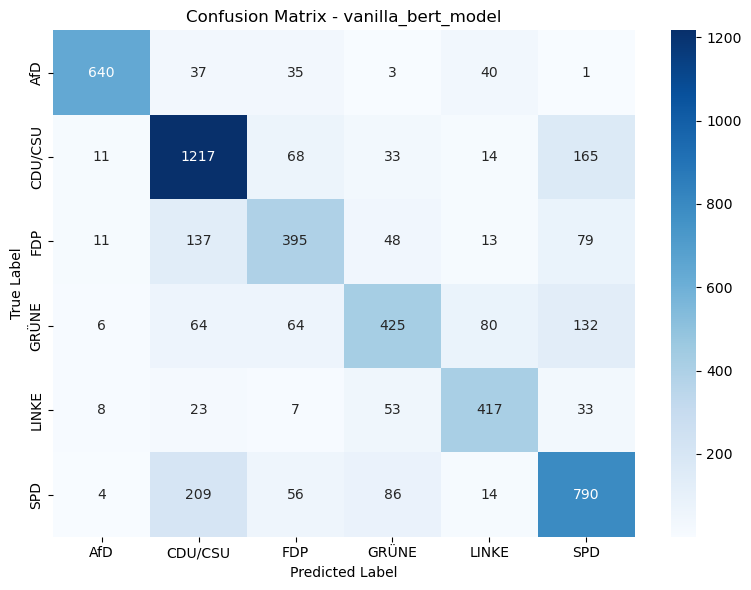

Model: slidingwindow_bert_model
  Accuracy: 0.804171280915467
  Balanced Accuracy: 0.7888836881077682
  Precision: 0.8154652639277679
  Recall: 0.7888836881077682
  F1-score: 0.7993156386294643
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.97      0.90      0.93       776
     CDU/CSU       0.81      0.85      0.83      1402
         FDP       0.78      0.67      0.72       713
       GRÜNE       0.76      0.63      0.69       712
       LINKE       0.85      0.82      0.83       581
         SPD       0.73      0.86      0.79      1234

    accuracy                           0.80      5418
   macro avg       0.82      0.79      0.80      5418
weighted avg       0.81      0.80      0.80      5418



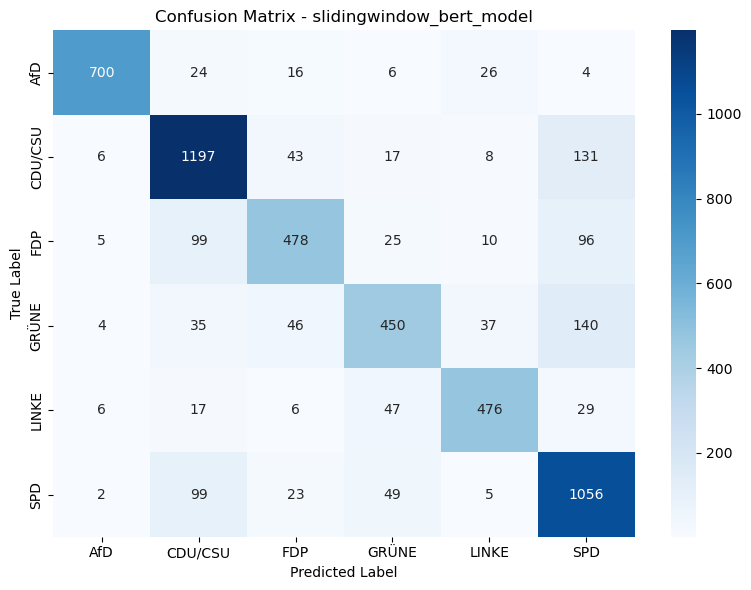

Model: tune_bert_model_A
  Accuracy: 0.7962347729789591
  Balanced Accuracy: 0.7800871577087086
  Precision: 0.8164112832761972
  Recall: 0.7800871577087086
  F1-score: 0.7916520625953445
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.93      0.94       776
     CDU/CSU       0.82      0.83      0.83      1402
         FDP       0.81      0.62      0.70       713
       GRÜNE       0.80      0.60      0.68       712
       LINKE       0.84      0.82      0.83       581
         SPD       0.68      0.88      0.76      1234

    accuracy                           0.80      5418
   macro avg       0.82      0.78      0.79      5418
weighted avg       0.80      0.80      0.79      5418



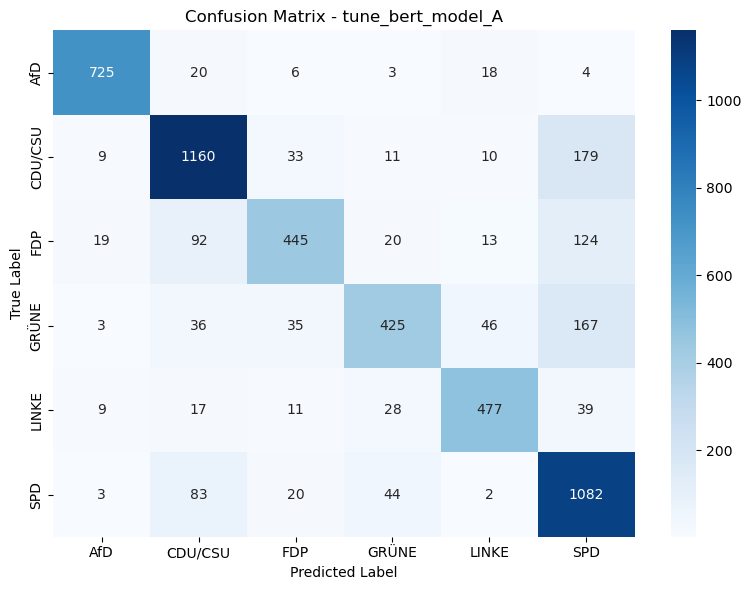

Model: tune_bert_model_B
  Accuracy: 0.6369509043927648
  Balanced Accuracy: 0.6322224982347332
  Precision: 0.6507697988104467
  Recall: 0.6322224982347332
  F1-score: 0.6317744160080815
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.93      0.72      0.81       776
     CDU/CSU       0.63      0.74      0.68      1402
         FDP       0.60      0.51      0.55       713
       GRÜNE       0.61      0.46      0.52       712
       LINKE       0.53      0.80      0.64       581
         SPD       0.61      0.57      0.59      1234

    accuracy                           0.64      5418
   macro avg       0.65      0.63      0.63      5418
weighted avg       0.65      0.64      0.64      5418



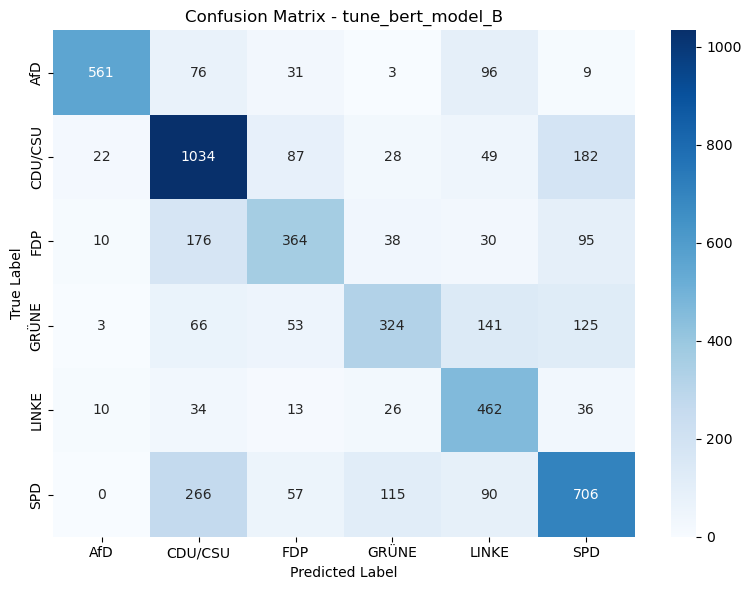

Model: weighted_bert_model
  Accuracy: 0.8056478405315615
  Balanced Accuracy: 0.7995493424520661
  Precision: 0.8169340230912839
  Recall: 0.7995493424520661
  F1-score: 0.8056101895426181
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.93      0.94       776
     CDU/CSU       0.85      0.81      0.83      1402
         FDP       0.80      0.65      0.72       713
       GRÜNE       0.75      0.70      0.72       712
       LINKE       0.85      0.86      0.86       581
         SPD       0.70      0.84      0.77      1234

    accuracy                           0.81      5418
   macro avg       0.82      0.80      0.81      5418
weighted avg       0.81      0.81      0.81      5418



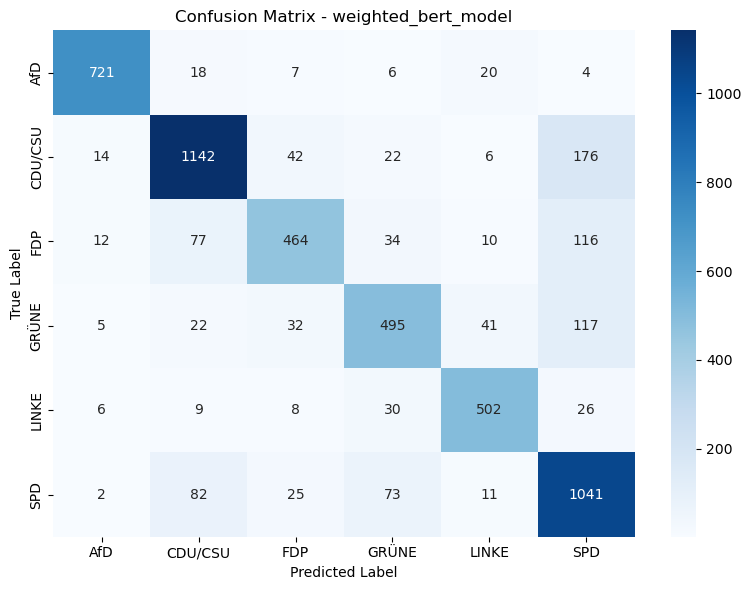

In [4]:
# evaluate
# On validation set
v1_val_results = get_metrics(v1_val["true_label"], v1_val["predicted_label"], v1_model_name)
v2_val_results = get_metrics(v2_val["label"], v2_val["prediction_label"], v2_model_name)
v3_val_results = get_metrics(v3_val["label"], v3_val["prediction_label"], v3_model_name)
v4_val_results = get_metrics(v4_val["label"], v4_val["prediction_label"], v4_model_name)
v5_val_results = get_metrics(v5_val["label"], v5_val["prediction_label"], v5_model_name)


all_results = {
    v1_model_name: v1_val_results[v1_model_name],
    v2_model_name: v2_val_results[v2_model_name],
    v3_model_name: v3_val_results[v3_model_name],
    v4_model_name: v4_val_results[v4_model_name],
    v5_model_name: v5_val_results[v5_model_name]
}

# Create a DataFrame
val_df = pd.DataFrame(all_results).T  # .T to transpose so each row is a version



____________________________________________________

Evaluation on test Set
_____________________________________________________


Model: vanilla_bert_model
  Accuracy: 0.7120708748615725
  Balanced Accuracy: 0.7065095110316534
  Precision: 0.7192983025612326
  Recall: 0.7065095110316534
  F1-score: 0.7099151264264133
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.86      0.90       744
     CDU/CSU       0.71      0.81      0.76      1428
         FDP       0.63      0.59      0.61       706
       GRÜNE       0.66      0.51      0.58       799
       LINKE       0.71      0.80      0.75       534
         SPD       0.65      0.67      0.66      1207

    accuracy                           0.71      5418
   macro avg       0.72      0.71      0.71      5418
weighted avg       0.71      0.71      0.71      5418



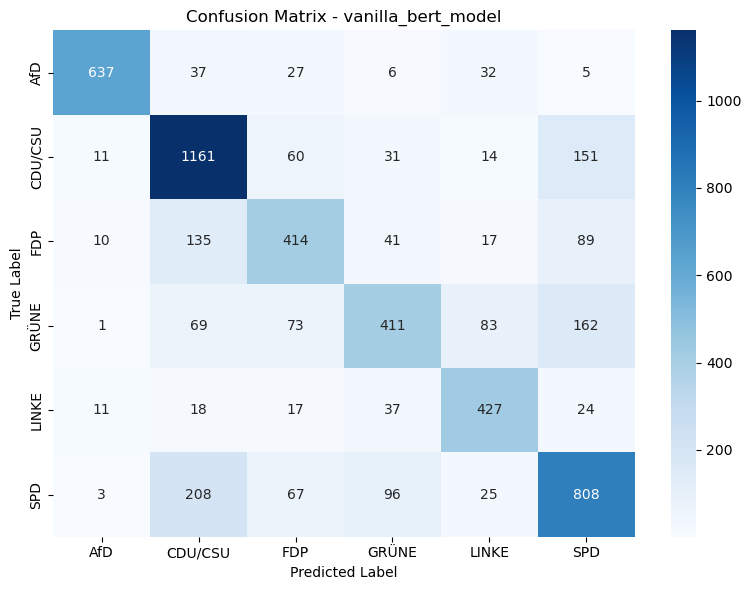

Model: slidingwindow_bert_model
  Accuracy: 0.7954964931709118
  Balanced Accuracy: 0.7843296111053965
  Precision: 0.8084749187045892
  Recall: 0.7843296111053965
  F1-score: 0.7926336182480193
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.90      0.92       747
     CDU/CSU       0.83      0.85      0.84      1426
         FDP       0.78      0.69      0.73       678
       GRÜNE       0.79      0.61      0.69       804
       LINKE       0.83      0.81      0.82       593
         SPD       0.69      0.84      0.76      1170

    accuracy                           0.80      5418
   macro avg       0.81      0.78      0.79      5418
weighted avg       0.80      0.80      0.79      5418



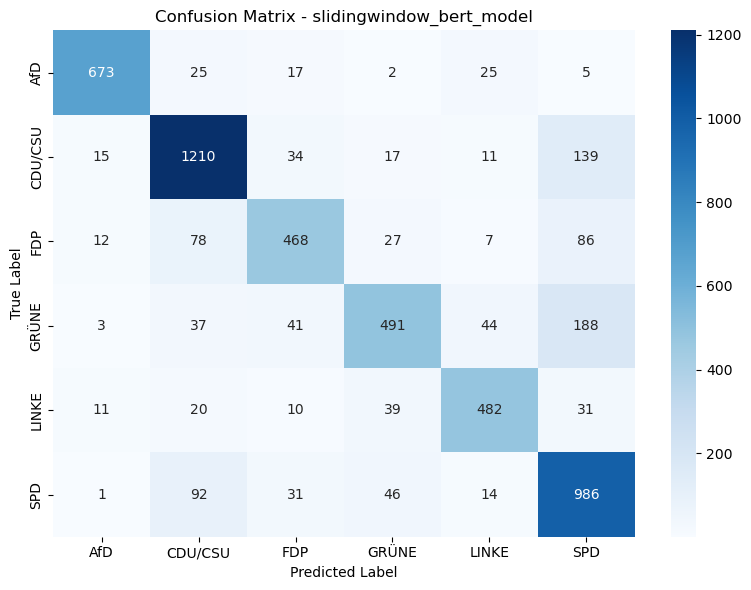

Model: tune_bert_model_A
  Accuracy: 0.778516057585825
  Balanced Accuracy: 0.7669352651556297
  Precision: 0.8036438265620661
  Recall: 0.7669352651556297
  F1-score: 0.7755717714702405
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.92      0.93      0.93       747
     CDU/CSU       0.83      0.81      0.82      1426
         FDP       0.78      0.65      0.71       678
       GRÜNE       0.83      0.53      0.65       804
       LINKE       0.82      0.81      0.82       593
         SPD       0.63      0.88      0.74      1170

    accuracy                           0.78      5418
   macro avg       0.80      0.77      0.78      5418
weighted avg       0.79      0.78      0.78      5418



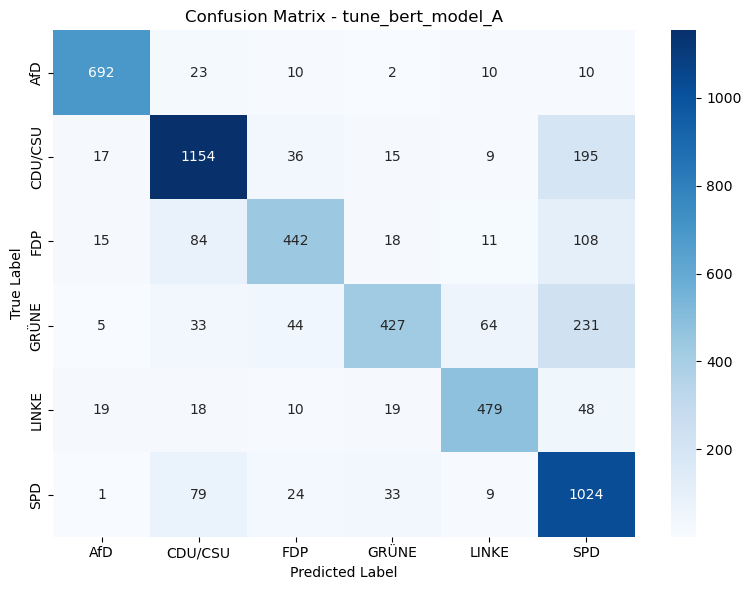

Model: tune_bert_model_B
  Accuracy: 0.6341823551125877
  Balanced Accuracy: 0.6322014876634449
  Precision: 0.650293057916714
  Recall: 0.6322014876634449
  F1-score: 0.6305012612735441
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.91      0.72      0.80       747
     CDU/CSU       0.63      0.73      0.68      1426
         FDP       0.61      0.51      0.56       678
       GRÜNE       0.62      0.44      0.52       804
       LINKE       0.53      0.82      0.65       593
         SPD       0.60      0.57      0.59      1170

    accuracy                           0.63      5418
   macro avg       0.65      0.63      0.63      5418
weighted avg       0.65      0.63      0.63      5418



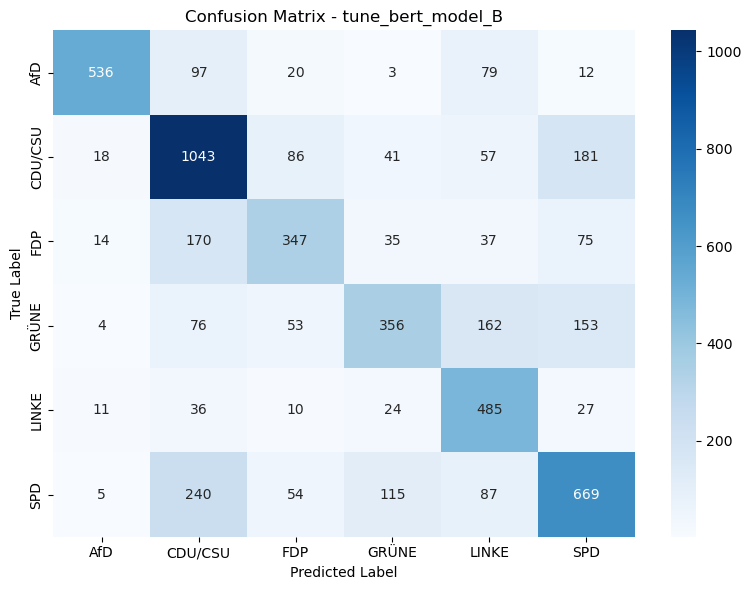

Model: weighted_bert_model
  Accuracy: 0.7947582133628646
  Balanced Accuracy: 0.7919994340643624
  Precision: 0.8057328215654156
  Recall: 0.7919994340643624
  F1-score: 0.7961863121746359
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.93      0.93      0.93       747
     CDU/CSU       0.85      0.80      0.82      1426
         FDP       0.79      0.68      0.73       678
       GRÜNE       0.77      0.67      0.72       804
       LINKE       0.82      0.84      0.83       593
         SPD       0.68      0.83      0.75      1170

    accuracy                           0.79      5418
   macro avg       0.81      0.79      0.80      5418
weighted avg       0.80      0.79      0.79      5418



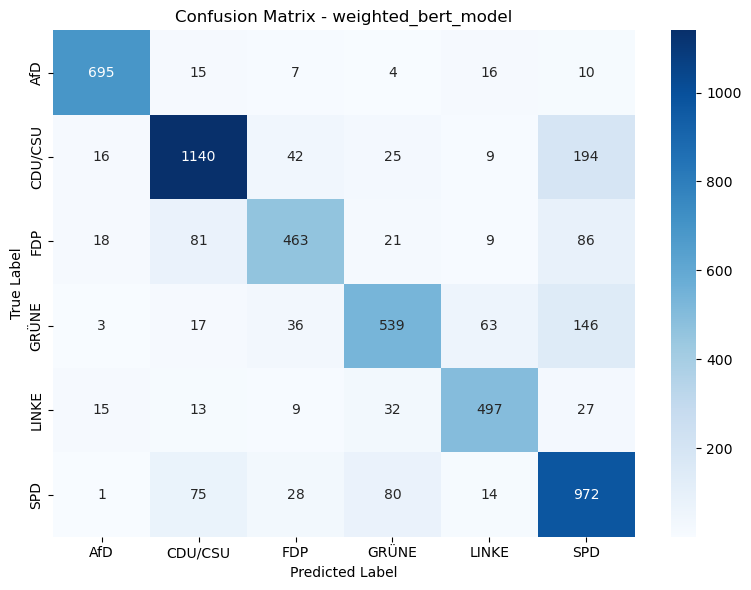

In [5]:
# On test set
v1_test_results = get_metrics(v1_test["true_label"], v1_test["predicted_label"], v1_model_name)
v2_test_results = get_metrics(v2_test["label"], v2_test["prediction_label"], v2_model_name)
v3_test_results = get_metrics(v3_test["label"], v3_test["prediction_label"], v3_model_name)
v4_test_results = get_metrics(v4_test["label"], v4_test["prediction_label"], v4_model_name)
v5_test_results = get_metrics(v5_test["label"], v5_test["prediction_label"], v5_model_name)


# save results to  1 df
all_results = {
    v1_model_name: v1_test_results[v1_model_name],
    v2_model_name: v2_test_results[v2_model_name],
    v3_model_name: v3_test_results[v3_model_name],
    v4_model_name: v4_test_results[v4_model_name],
    v5_model_name: v5_test_results[v5_model_name]
}

# Create a DataFrame
test_df = pd.DataFrame(all_results).T  # .T to transpose so each row is a version


____________________________________________________

### Final Comparison table and Visualisation
_____________________________________________________


In [6]:
val_df

,acc,bal_acc,precision,recall,f1
vanilla_bert_model,0.716870,0.705928,0.721704,0.705928,0.711875
slidingwindow_bert_model,0.804171,0.788884,0.815465,0.788884,0.799316
tune_bert_model_A,0.796235,0.780087,0.816411,0.780087,0.791652
tune_bert_model_B,0.636951,0.632222,0.650770,0.632222,0.631774
weighted_bert_model,0.805648,0.799549,0.816934,0.799549,0.805610


In [7]:
test_df

,acc,bal_acc,precision,recall,f1
vanilla_bert_model,0.712071,0.706510,0.719298,0.706510,0.709915
slidingwindow_bert_model,0.795496,0.784330,0.808475,0.784330,0.792634
tune_bert_model_A,0.778516,0.766935,0.803644,0.766935,0.775572
tune_bert_model_B,0.634182,0.632201,0.650293,0.632201,0.630501
weighted_bert_model,0.794758,0.791999,0.805733,0.791999,0.796186


____________________________________________________

Look at hyperparameter for report
_____________________________________________________


In [10]:
hyperpara_v3 = pd.read_csv("../data/allresultsA/hyperpara_A.csv")

pprint.pprint(hyperpara_v3['0'].iloc[2])

("{'learning_rate': 2e-05, 'per_device_train_batch_size': 16, "
 "'num_train_epochs': 4, 'weight_decay': 0.01}")


In [11]:
hyperpara_v4 = pd.read_csv("../data/allresultsB/hyperpara_B.csv")

pprint.pprint(hyperpara_v4['0'].iloc[2])

("{'learning_rate': 2e-05, 'per_device_train_batch_size': 8, "
 "'num_train_epochs': 3, 'weight_decay': 0.05}")
